In [1]:
pwd

'C:\\Users\\Armando\\OneDrive\\Desktop\\Armand-Covid\\Armand-Project'

In [2]:
import os
import io
import json
import math
import pandas as pd
import networkx as nx
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Data
REGIONI.JSON(21 REGIONS)
It takes in considertation 311 days ,from 24.02.2020-30.12.2020 and gives the result for every day . 

In [3]:
data = "data/"

with open(os.path.join(data, "dpc-covid19-ita-regioni.json")) as f:
    regions = json.load(f)

with open(os.path.join(data, "dpc-covid19-ita-province.json")) as f:
    provinces = json.load(f)

In [4]:
regions[3] # this show an element of regions

{'data': '2020-02-24T18:00:00',
 'stato': 'ITA',
 'codice_regione': 15,
 'denominazione_regione': 'Campania',
 'lat': 40.83956555,
 'long': 14.25084984,
 'ricoverati_con_sintomi': 0,
 'terapia_intensiva': 0,
 'totale_ospedalizzati': 0,
 'isolamento_domiciliare': 0,
 'totale_positivi': 0,
 'variazione_totale_positivi': 0,
 'nuovi_positivi': 0,
 'dimessi_guariti': 0,
 'deceduti': 0,
 'casi_da_sospetto_diagnostico': None,
 'casi_da_screening': None,
 'totale_casi': 0,
 'tamponi': 10,
 'casi_testati': None,
 'note': None,
 'ingressi_terapia_intensiva': None,
 'note_test': None,
 'note_casi': None}

# Pandas
Pandas is a software library written for the Python programming language for data manipulation and analysis.

In [5]:
df_regions = pd.DataFrame(regions)
df_provinces = pd.DataFrame(provinces)

# pandas.DataFrame.describe
DataFrame.describe(percentiles=None, include=None, exclude=None)
Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles

In [6]:
df_regions.describe()

codice_regione          lat         long  ricoverati_con_sintomi  \
count     6531.000000  6531.000000  6531.000000             6531.000000   
mean        11.857143    43.046293    12.225955              566.052978   
std          6.274279     2.488971     2.659151             1289.377434   
min          1.000000    38.115697     7.320149                0.000000   
25%          7.000000    41.125596    11.121231               18.000000   
50%         12.000000    43.616760    12.388247              109.000000   
75%         17.000000    45.434905    13.768136              466.000000   
max         22.000000    46.499335    16.867367            12077.000000   

       terapia_intensiva  totale_ospedalizzati  isolamento_domiciliare  \
count        6531.000000           6531.000000             6531.000000   
mean           62.175011            628.227990             7518.282193   
std           137.836341           1422.597508            18448.171472   
min             0.000000              0.000000                0.000000   
25%             1.000000             20.000000              161.500000   
50%            11.000000            125.000000              940.000000   
75%            57.000000            516.500000             5018.000000   
max          1381.000000          13328.000000           155066.000000   

       totale_positivi  variazione_totale_positivi  nuovi_positivi  \
count      6531.000000                 6531.000000     6531.000000   
mean       8146.510182                   86.384015      319.579850   
std       19392.876016                  813.583635      829.313924   
min           0.000000               -21926.000000     -229.000000   
25%         198.500000                   -7.000000        4.000000   
50%        1146.000000                    5.000000       39.000000   
75%        5656.000000                   76.000000      210.000000   
max      164406.000000                10263.000000    11489.000000   

       dimessi_guariti      deceduti  casi_da_sospetto_diagnostico  \
count      6531.000000   6531.000000                   3402.000000   
mean      13088.370234   1608.975042                  16472.772193   
std       32033.298166   3563.021092                  32188.413270   
min           0.000000      0.000000                      0.000000   
25%         950.000000    120.000000                   2052.250000   
50%        3150.000000    408.000000                   5290.500000   
75%       10447.000000   1213.500000                  19285.750000   
max      397010.000000  25038.000000                 305002.000000   

       casi_da_screening    totale_casi       tamponi  casi_testati  \
count         3402.00000    6531.000000  6.531000e+03  5.376000e+03   
mean          6319.39565   22843.858062  4.159616e+05  2.993324e+05   
std          15054.35195   49811.695158  6.527392e+05  3.931577e+05   
min              0.00000       0.000000  0.000000e+00  3.482000e+03   
25%            117.00000    1459.500000  4.504600e+04  6.976450e+04   
50%           1493.00000    5170.000000  1.737250e+05  1.511245e+05   
75%           5469.00000   20702.500000  4.477395e+05  3.400898e+05   
max         113150.00000  475044.000000  4.826709e+06  2.597894e+06   

       ingressi_terapia_intensiva  
count                  588.000000  
mean                     8.513605  
std                     10.898079  
min                      0.000000  
25%                      1.000000  
50%                      4.000000  
75%                     13.000000  
max                     63.000000

In [7]:
df_regions.dtypes

data                             object
stato                            object
codice_regione                    int64
denominazione_regione            object
lat                             float64
long                            float64
ricoverati_con_sintomi            int64
terapia_intensiva                 int64
totale_ospedalizzati              int64
isolamento_domiciliare            int64
totale_positivi                   int64
variazione_totale_positivi        int64
nuovi_positivi                    int64
dimessi_guariti                   int64
deceduti                          int64
casi_da_sospetto_diagnostico    float64
casi_da_screening               float64
totale_casi                       int64
tamponi                           int64
casi_testati                    float64
note                             object
ingressi_terapia_intensiva      float64
note_test                        object
note_casi                        object
dtype: object

# pandas.DataFrame.drop
Remove rows or columns (that we consider unnecessary because they provide redundant information) by specifying directly index or column names  

In [8]:
df_regions.drop(columns=["stato","note", "note_test","note_casi", "lat", "long",],inplace=True)
df_provinces.drop(columns=["stato", "note"],inplace=True) 

df_regions.dtypes

data                             object
codice_regione                    int64
denominazione_regione            object
ricoverati_con_sintomi            int64
terapia_intensiva                 int64
totale_ospedalizzati              int64
isolamento_domiciliare            int64
totale_positivi                   int64
variazione_totale_positivi        int64
nuovi_positivi                    int64
dimessi_guariti                   int64
deceduti                          int64
casi_da_sospetto_diagnostico    float64
casi_da_screening               float64
totale_casi                       int64
tamponi                           int64
casi_testati                    float64
ingressi_terapia_intensiva      float64
dtype: object

In [9]:
df_provinces.dtypes

data                        object
codice_regione               int64
denominazione_regione       object
codice_provincia             int64
denominazione_provincia     object
sigla_provincia             object
lat                        float64
long                       float64
totale_casi                  int64
dtype: object

In [10]:
df_regions.data == df_regions.iloc[[-1]]["data"].item()

0       False
1       False
2       False
3       False
4       False
        ...  
6526     True
6527     True
6528     True
6529     True
6530     True
Name: data, Length: 6531, dtype: bool

# df.set_index
Set the index to analyze the ‘data’ and 'denominazione_regione' column

In [11]:
df_regions["data"] = pd.DatetimeIndex(df_regions["data"]).normalize()
df_provinces["data"] = pd.DatetimeIndex(df_provinces["data"]).normalize()

In [12]:
df_region_index = df_regions.set_index(["data", "denominazione_regione"])
df_region_index.head()

codice_regione  ricoverati_con_sintomi  \
data       denominazione_regione                                           
2020-02-24 Abruzzo                            13                       0   
           Basilicata                         17                       0   
           Calabria                           18                       0   
           Campania                           15                       0   
           Emilia-Romagna                      8                      10   

                                  terapia_intensiva  totale_ospedalizzati  \
data       denominazione_regione                                            
2020-02-24 Abruzzo                                0                     0   
           Basilicata                             0                     0   
           Calabria                               0                     0   
           Campania                               0                     0   
           Emilia-Romagna                         2                    12   

                                  isolamento_domiciliare  totale_positivi  \
data       denominazione_regione                                            
2020-02-24 Abruzzo                                     0                0   
           Basilicata                                  0                0   
           Calabria                                    0                0   
           Campania                                    0                0   
           Emilia-Romagna                              6               18   

                                  variazione_totale_positivi  nuovi_positivi  \
data       denominazione_regione                                               
2020-02-24 Abruzzo                                         0               0   
           Basilicata                                      0               0   
           Calabria                                        0               0   
           Campania                                        0               0   
           Emilia-Romagna                                  0              18   

                                  dimessi_guariti  deceduti  \
data       denominazione_regione                              
2020-02-24 Abruzzo                              0         0   
           Basilicata                           0         0   
           Calabria                             0         0   
           Campania                             0         0   
           Emilia-Romagna                       0         0   

                                  casi_da_sospetto_diagnostico  \
data       denominazione_regione                                 
2020-02-24 Abruzzo                                         NaN   
           Basilicata                                      NaN   
           Calabria                                        NaN   
           Campania                                        NaN   
           Emilia-Romagna                                  NaN   

                                  casi_da_screening  totale_casi  tamponi  \
data       denominazione_regione                                            
2020-02-24 Abruzzo                              NaN            0        5   
           Basilicata                           NaN            0        0   
           Calabria                             NaN            0        1   
           Campania                             NaN            0       10   
           Emilia-Romagna                       NaN           18      148   

                                  casi_testati  ingressi_terapia_intensiva  
data       denominazione_regione                                            
2020-02-24 Abruzzo                         NaN                         NaN  
           Basilicata                      NaN                         NaN  
           Calabria                        NaN                         NaN  
           Campania           

In [13]:
df_provinces_index = df_provinces.set_index(["data", "denominazione_regione"])
df_provinces_index.head()

codice_regione  codice_provincia  \
data       denominazione_regione                                     
2020-02-24 Abruzzo                            13                66   
           Abruzzo                            13                67   
           Abruzzo                            13                68   
           Abruzzo                            13                69   
           Abruzzo                            13               979   

                                               denominazione_provincia  \
data       denominazione_regione                                         
2020-02-24 Abruzzo                                            L'Aquila   
           Abruzzo                                              Teramo   
           Abruzzo                                             Pescara   
           Abruzzo                                              Chieti   
           Abruzzo                In fase di definizione/aggiornamento   

                                 sigla_provincia        lat       long  \
data       denominazione_regione                                         
2020-02-24 Abruzzo                            AQ  42.351222  13.398438   
           Abruzzo                            TE  42.658918  13.704400   
           Abruzzo                            PE  42.464584  14.213648   
           Abruzzo                            CH  42.351032  14.167546   
           Abruzzo                          None        NaN        NaN   

                                  totale_casi  
data       denominazione_regione               
2020-02-24 Abruzzo                          0  
           Abruzzo                          0  
           Abruzzo                          0  
           Abruzzo                          0  
           Abruzzo                          0

In [14]:
lastday = df_regions.loc[df_regions.data == df_regions.iloc[[-1]]["data"].item()]
lastday = lastday[["data", "denominazione_regione", "deceduti", "totale_ospedalizzati",
               "totale_casi","dimessi_guariti", "tamponi","casi_testati","ingressi_terapia_intensiva"]]
lastday["percentuale_guariti"] = lastday["dimessi_guariti"] / lastday["totale_casi"] * 100
lastday["percentuale_terapia_intensiva"] = lastday["ingressi_terapia_intensiva"] / lastday["totale_ospedalizzati"] * 100
lastday["percentuale_positivi"] = lastday["totale_casi"] / lastday["casi_testati"] * 100
display(lastday)

data  denominazione_regione  deceduti  totale_ospedalizzati  \
6510 2020-12-30                Abruzzo      1206                   468   
6511 2020-12-30             Basilicata       255                    93   
6512 2020-12-30               Calabria       468                   274   
6513 2020-12-30               Campania      2812                  1459   
6514 2020-12-30         Emilia-Romagna      7683                  2871   
6515 2020-12-30  Friuli Venezia Giulia      1627                   700   
6516 2020-12-30                  Lazio      3696                  3111   
6517 2020-12-30                Liguria      2880                   775   
6518 2020-12-30              Lombardia     25038                  4098   
6519 2020-12-30                 Marche      1557                   530   
6520 2020-12-30                 Molise       188                    63   
6521 2020-12-30           P.A. Bolzano       731                   190   
6522 2020-12-30            P.A. Trento       933                   425   
6523 2020-12-30               Piemonte      7893                  3149   
6524 2020-12-30                 Puglia      2451                  1625   
6525 2020-12-30               Sardegna       743                   540   
6526 2020-12-30                Sicilia      2381                  1251   
6527 2020-12-30                Toscana      3655                  1029   
6528 2020-12-30                 Umbria       618                   300   
6529 2020-12-30          Valle d'Aosta       379                    74   
6530 2020-12-30                 Veneto      6410                  3069   

      totale_casi  dimessi_guariti  tamponi  casi_testati  \
6510        34858            22616   512111      268650.0   
6511        10679             4429   182937      117195.0   
6512        23518            14319   437520      419041.0   
6513       188119           107696  2016361     1344827.0   
6514       169396           105656  2556405     1221526.0   
6515        49150            35876   924819      338891.0   
6516       161284            83125  2690302     2039177.0   
6517        59997            51489   706883      322079.0   
6518       475044           397010  4826709     2597894.0   
6519        40921            28792   526915      311670.0   
6520         6440             4191   114520      105056.0   
6521        29234            17901   359695      162050.0   
6522        21520            18874   447759      151147.0   
6523       196461           159609  1673896      981588.0   
6524        89303            34112  1033478      649695.0   
6525        30745            13677   478936      401858.0   
6526        92345            56577  1211824      808160.0   
6527       119696           106304  1872240     1057968.0   
6528        28660            24336   500003      251329.0   
6529         7244             6459    62480       37323.0   
6530       249075           152642  3276810     1208044.0   

      ingressi_terapia_intensiva  percentuale_guariti  \
6510                         4.0            64.880372   
6511                         0.0            41.473921   
6512                         1.0            60.885279   
6513                         0.0            57.248869   
6514                        19.0            62.372193   
6515                         5.0            72.992879   
6516                        18.0            51.539520   
6517                         2.0            85.819291   
6518                        21.0            83.573311   
6519                         7.0            70.359962   
6520                         2.0            65.077640   
6521                         1.0            61.233495   
6522                         5.0            87.704461   
6523                         7.0            81.242079   
6524                        11.0            38.198045   
6525                         4.0            44.485282   
6526                        12.0            61.266988   
6527         

In [15]:
lastday.drop(columns=["denominazione_regione","percentuale_guariti","data","tamponi","totale_casi","casi_testati","ingressi_terapia_intensiva","percentuale_terapia_intensiva","percentuale_positivi"],inplace=True)
lastday.sum(axis = 0, skipna = True)

deceduti                  73604
totale_ospedalizzati      26094
dimessi_guariti         1445690
dtype: int64

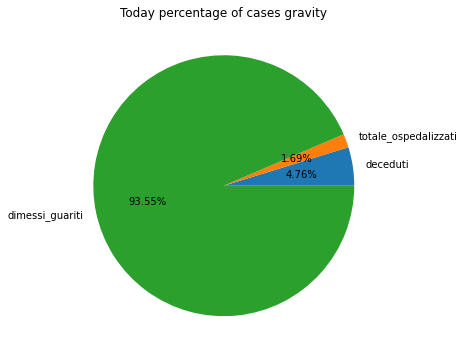

In [16]:
ax = lastday.sum(axis = 0, skipna = True).plot.pie(title="Today percentage of cases gravity",figsize=(12,6), autopct='%1.2f%%',
        shadow=False, legend = False)
ax.set_ylabel(None);

In [17]:
# data manipulation
# first chose the data to display and group by column "data" with daily frequency
data_to_plot = df_regions[["data","totale_positivi","totale_ospedalizzati","deceduti"]]
data_to_plot = data_to_plot.groupby(["data"]).sum().asfreq("D")

In [18]:
data_to_plot 

totale_positivi  totale_ospedalizzati  deceduti
data                                                       
2020-02-24              221                   127         7
2020-02-25              311                   149        10
2020-02-26              385                   164        12
2020-02-27              588                   304        17
2020-02-28              821                   409        21
...                     ...                   ...       ...
2020-12-26           580943                 25892     71627
2020-12-27           581760                 26151     71925
2020-12-28           575221                 26497     72370
2020-12-29           568728                 26211     73029
2020-12-30           564395                 26094     73604

[311 rows x 3 columns]

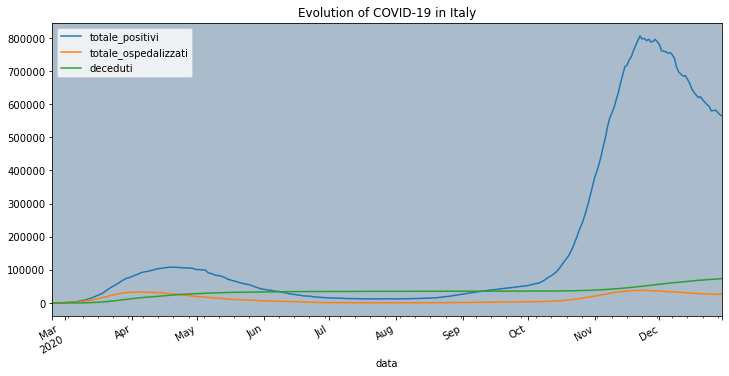

In [19]:
# start plotting for this data    
ax = data_to_plot.plot(figsize=(12,6),title="Evolution of COVID-19 in Italy")
ax.set_facecolor("#abc") # RGB(Red Green Blue) color
plt.gcf().autofmt_xdate()

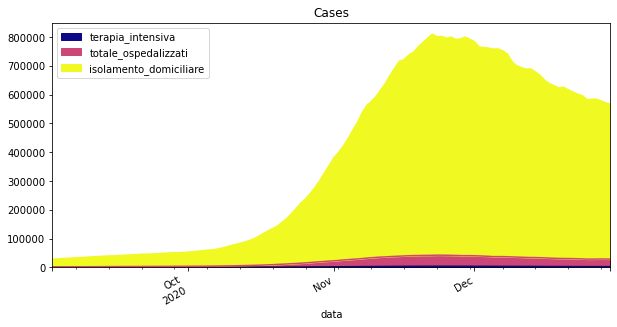

In [20]:
# data manipulation
data_to_plot = df_regions[["data","terapia_intensiva","totale_ospedalizzati","isolamento_domiciliare"]]
# for the last 4 months
data_to_plot = data_to_plot.loc[data_to_plot["data"]>"2020-09-01"]
# group by data with week frequency
data_to_plot = data_to_plot.groupby(["data"]).sum().asfreq("D")

# start plotting     
data_to_plot.plot.area(figsize=(10,5),title="Cases",colormap="plasma")
plt.gcf().autofmt_xdate()

In [21]:
data_to_plot

terapia_intensiva  totale_ospedalizzati  isolamento_domiciliare
data                                                                       
2020-09-02                109                  1546                   26271
2020-09-03                120                  1625                   27290
2020-09-04                121                  1728                   28371
2020-09-05                121                  1741                   29453
2020-09-06                133                  1816                   30262
...                       ...                   ...                     ...
2020-12-26               2580                 25892                  555051
2020-12-27               2580                 26151                  555609
2020-12-28               2565                 26497                  548724
2020-12-29               2549                 26211                  542517
2020-12-30               2528                 26094                  538301

[120 rows x 3 columns]

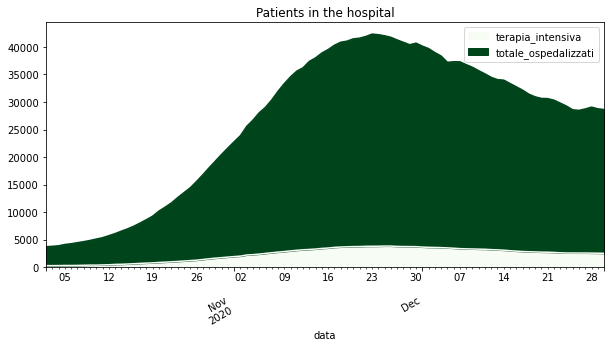

In [22]:
data_to_plot = df_regions[["data","terapia_intensiva","totale_ospedalizzati"]]
# focus on the last 2 months data>2020-10-01T18:00:00
# data field can be changed for made different views

data_to_plot = data_to_plot.loc[data_to_plot["data"]>"2020-10-01"]
# group by data with week frequency
data_to_plot = data_to_plot.groupby(["data"]).sum().asfreq("D")

# start plotting for this data i use the .plot() of pandas      
data_to_plot.plot.area(figsize=(10,5),title="Patients in the hospital",colormap="Greens")
plt.gcf().autofmt_xdate()

# Which are the regions with the most number of tampons 

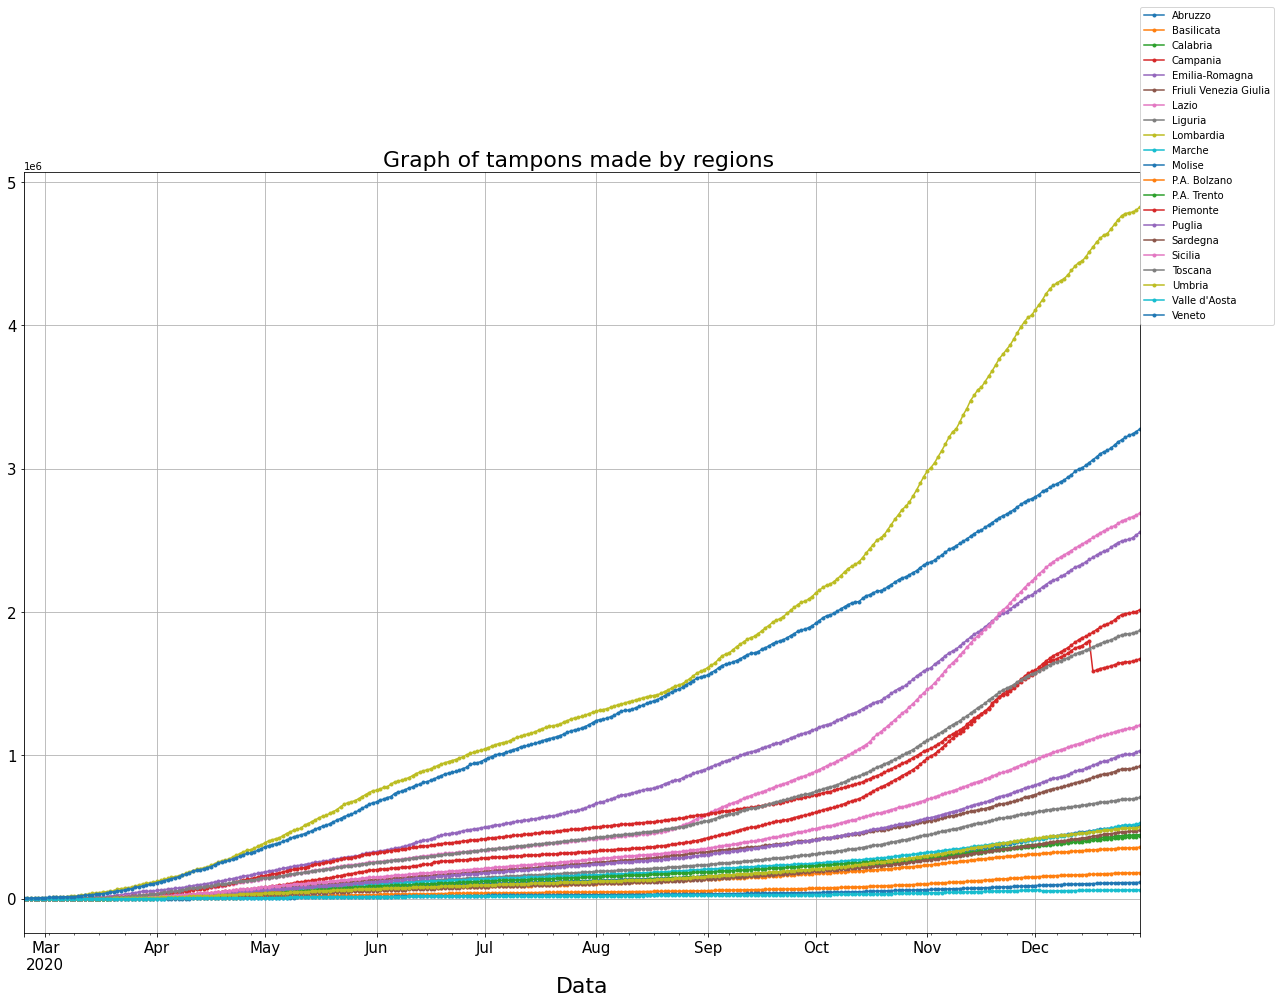

In [23]:
tamponbyregion = df_regions.pivot_table('tamponi', index=['data'], columns=['denominazione_regione'])
tamponbyregion.plot(figsize=(20,14), marker='.', fontsize=15) # marker is the type of the line,in this case line is built by poins
plt.title('Graph of tampons made by regions ', size = 22)
plt.xlabel('Data',size = 22)
plt.legend(loc=(1,0.8))
plt.grid()

In [24]:
tamponbyregion

denominazione_regione  Abruzzo  Basilicata  Calabria  Campania  \
data                                                             
2020-02-24                   5           0         1        10   
2020-02-25                   5           0         2        10   
2020-02-26                  13           0         3        10   
2020-02-27                  33           0        14        10   
2020-02-28                  33           0        21       213   
...                        ...         ...       ...       ...   
2020-12-26              505748      180627    429174   1989495   
2020-12-27              506082      180690    429979   1992877   
2020-12-28              506661      180907    431495   1997527   
2020-12-29              508059      181611    434303   2004376   
2020-12-30              512111      182937    437520   2016361   

denominazione_regione  Emilia-Romagna  Friuli Venezia Giulia    Lazio  \
data                                                                    
2020-02-24                        148                     58      124   
2020-02-25                        391                     89      124   
2020-02-26                        577                    114      124   
2020-02-27                       1033                    141      552   
2020-02-28                       1277                    169      611   
...                               ...                    ...      ...   
2020-12-26                    2502232                 906413  2646199   
2020-12-27                    2508298                 907700  2656014   
2020-12-28                    2518742                 909588  2665428   
2020-12-29                    2538045                 916889  2676624   
2020-12-30                    2556405                 924819  2690302   

denominazione_regione  Liguria  Lombardia  Marche  ...  P.A. Bolzano  \
data                                               ...                 
2020-02-24                   1       1463      16  ...             1   
2020-02-25                  39       3700      21  ...             1   
2020-02-26                  66       3208      28  ...             1   
2020-02-27                  78       3320      46  ...             2   
2020-02-28                 112       4835      47  ...             2   
...                        ...        ...     ...  ...           ...   
2020-12-26              694040    4780837  513159  ...        354359   
2020-12-27              695223    4785738  514332  ...        355149   
2020-12-28              696992    4791224  515371  ...        356239   
2020-12-29              701035    4802831  519600  ...        357337   
2020-12-30              706883    4826709  526915  ...        359695   

denominazione_regione  P.A. Trento  Piemonte   Puglia  Sardegna  Sicilia  \
data                                                                       
2020-02-24                       3       141        0         1        5   
2020-02-25                       3       141        0         1        5   
2020-02-26                       3       156        0         1        5   
2020-02-27                      32       156        0         1        5   
2020-02-28                      32       227      242         1        5   
...                            ...       ...      ...       ...      ...   
2020-12-26                  442014   1651049  1006794    469168  1183197   
2020-12-27                  442600   1654351  1008542    470328  1188827   
2020-12-28                  443360   1657292  1012689    471896  1194520   
2020-12-29                  445114   1664929  1022357    474385  1203327   
2020-12-30                  447759   1673896  1033478    478936  1211824   

denominazione_regione  Toscana  Umbria  Valle d'Aosta   Veneto  
data                                                            
2020-02-24                 140       0              7     2200  
2020-02-25                 296       8              7     3780  
2020-

# Understand the correlation of variables in df_regions through the heatmap method

<AxesSubplot:>

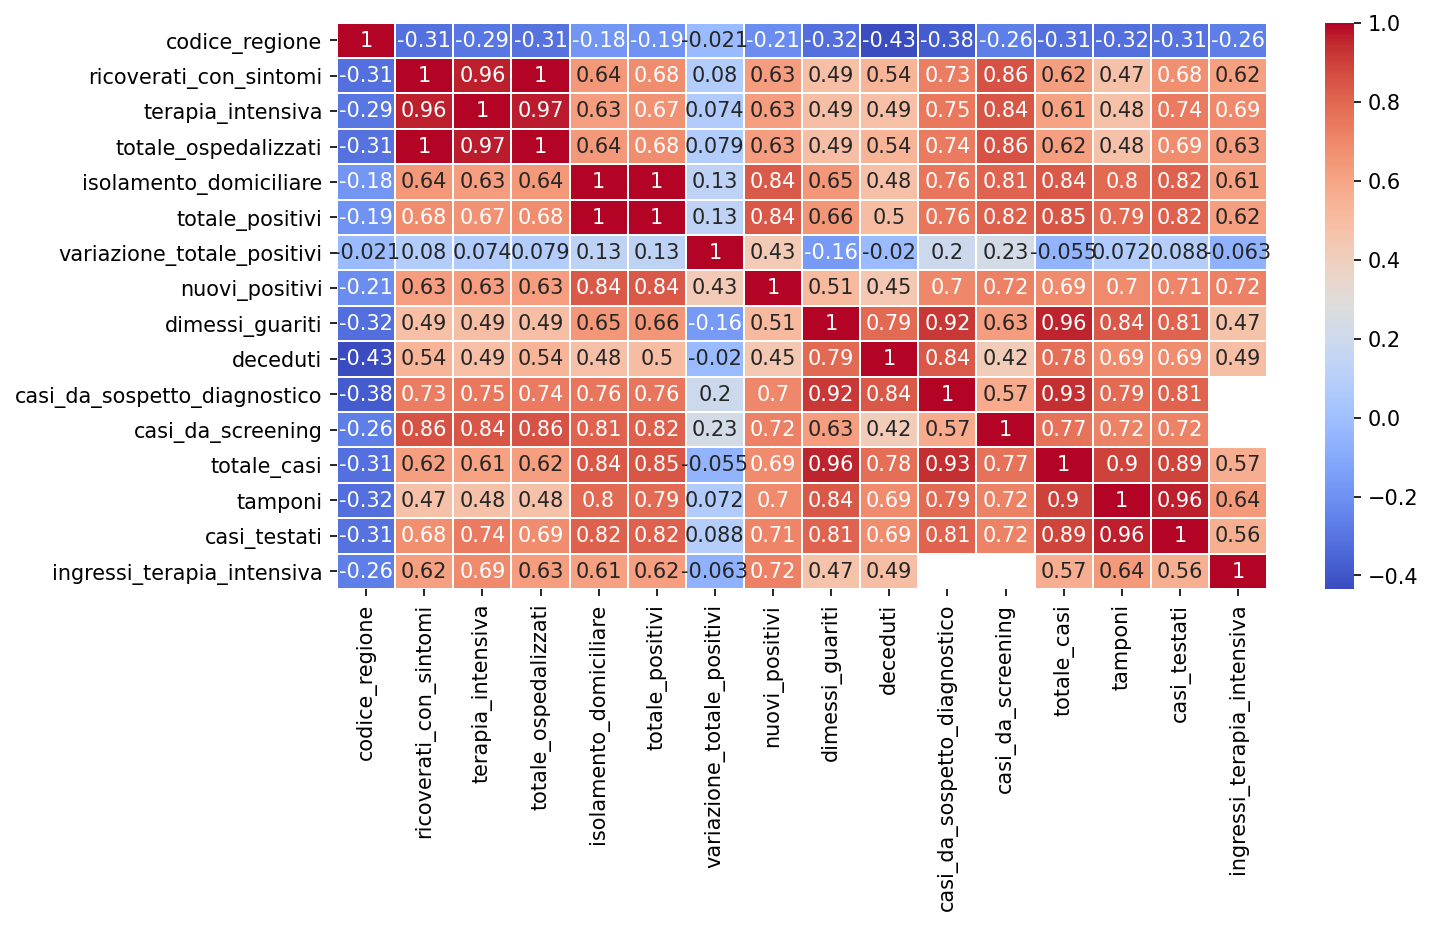

In [25]:
plt.figure(figsize=(10,5), dpi = 150)
sns.heatmap(df_regions.corr(), annot=True, linewidths= 0.5 , cmap = 'coolwarm')

In [26]:
df_regions.corr() # Variables with NaN value seems to a whitespace in heatmap 

codice_regione  ricoverati_con_sintomi  \
codice_regione                      1.000000               -0.311732   
ricoverati_con_sintomi             -0.311732                1.000000   
terapia_intensiva                  -0.291218                0.962989   
totale_ospedalizzati               -0.310756                0.999659   
isolamento_domiciliare             -0.177200                0.642030   
totale_positivi                    -0.191364                0.684086   
variazione_totale_positivi         -0.020958                0.079625   
nuovi_positivi                     -0.211403                0.627071   
dimessi_guariti                    -0.320894                0.489312   
deceduti                           -0.434030                0.539378   
casi_da_sospetto_diagnostico       -0.380589                0.734274   
casi_da_screening                  -0.263400                0.859354   
totale_casi                        -0.311912                0.619583   
tamponi                            -0.318588                0.474058   
casi_testati                       -0.307521                0.677773   
ingressi_terapia_intensiva         -0.263584                0.616197   

                              terapia_intensiva  totale_ospedalizzati  \
codice_regione                        -0.291218             -0.310756   
ricoverati_con_sintomi                 0.962989              0.999659   
terapia_intensiva                      1.000000              0.969700   
totale_ospedalizzati                   0.969700              1.000000   
isolamento_domiciliare                 0.625550              0.642517   
totale_positivi                        0.666211              0.684574   
variazione_totale_positivi             0.073524              0.079292   
nuovi_positivi                         0.628385              0.629233   
dimessi_guariti                        0.494393              0.491392   
deceduti                               0.487740              0.536125   
casi_da_sospetto_diagnostico           0.750390              0.737392   
casi_da_screening                      0.844135              0.859741   
totale_casi                            0.612198              0.620878   
tamponi                                0.476032              0.475787   
casi_testati                           0.739951              0.685847   
ingressi_terapia_intensiva             0.692621              0.627319   

                              isolamento_domiciliare  totale_positivi  \
codice_regione                             -0.177200        -0.191364   
ricoverati_con_sintomi                      0.642030         0.684086   
terapia_intensiva                           0.625550         0.666211   
totale_ospedalizzati                        0.642517         0.684574   
isolamento_domiciliare                      1.000000         0.998419   
totale_positivi                             0.998419         1.000000   
variazione_totale_positivi                  0.129306         0.128823   
nuovi_positivi                              0.835655         0.841105   
dimessi_guariti                             0.652550         0.656809   
deceduti                                    0.482160         0.498000   
casi_da_sospetto_diagnostico                0.755448         0.756776   
casi_da_screening                           0.810585         0.815577   
totale_casi                                 0.842844         0.847331   
tamponi                                     0.795357         0.791514   
casi_testati                                0.817211         0.817905   
ingressi_terapia_intensiva                  0.613920         0.619655   

                              variazione_totale_positivi  nuovi_positivi  \
codice_regione                                 -0.020958       -0.211403   
ricoverati_con_sintomi                          0.079625        0.627071   
terapia_intensiva                               0.073524        0.628385   
totale_ospedalizz

# Analysis of Provinces

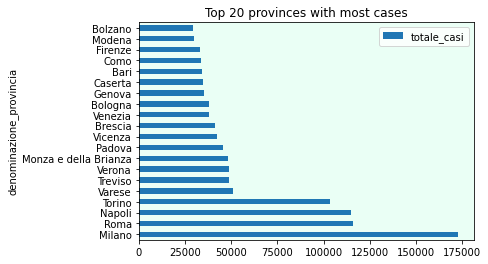

In [27]:
data_to_plot = df_provinces[["denominazione_provincia","totale_casi"]]
# 20 is the nr of provinces
ax = data_to_plot.groupby(["denominazione_provincia"]).max().nlargest(20, "totale_casi").plot(title=("Top "+ str(20) + " provinces with most cases"),kind="barh")
ax.set_facecolor("#eafff5")

In [28]:
data_to_plot

denominazione_provincia  totale_casi
0                                  L'Aquila            0
1                                    Teramo            0
2                                   Pescara            0
3                                    Chieti            0
4      In fase di definizione/aggiornamento            0
...                                     ...          ...
43772                               Venezia        38173
43773                                Padova        45587
43774                                Rovigo         7340
43775    Fuori Regione / Provincia Autonoma         3490
43776  In fase di definizione/aggiornamento          546

[43777 rows x 2 columns]

# Let's see the variation in time of these provinces

In [29]:
data_to_plot = df_provinces[["denominazione_provincia","totale_casi"]]
maxcas_df = data_to_plot.groupby(["denominazione_provincia"]).max().nlargest(10, "totale_casi")
names_prov = (maxcas_df.index) #print(nomi_province) #create a list with the max affected provinces

In [30]:
maxcas_df

totale_casi
denominazione_provincia             
Milano                        172597
Roma                          115935
Napoli                        114635
Torino                        103512
Varese                         51136
Treviso                        48582
Verona                         48574
Monza e della Brianza          48078
Padova                         45587
Vicenza                        42345

In [31]:
names_prov

Index(['Milano', 'Roma', 'Napoli', 'Torino', 'Varese', 'Treviso', 'Verona',
       'Monza e della Brianza', 'Padova', 'Vicenza'],
      dtype='object', name='denominazione_provincia')

In [32]:
# find all the cases from initial start to the end for cities with the most larg nr of totale_casi 
# and group them
df_plot = df_provinces.loc[df_provinces.denominazione_provincia.isin(names_prov)]
df_plot = df_plot.groupby(['denominazione_provincia', pd.Grouper(key='data', freq='W')])['totale_casi'].sum().reset_index()

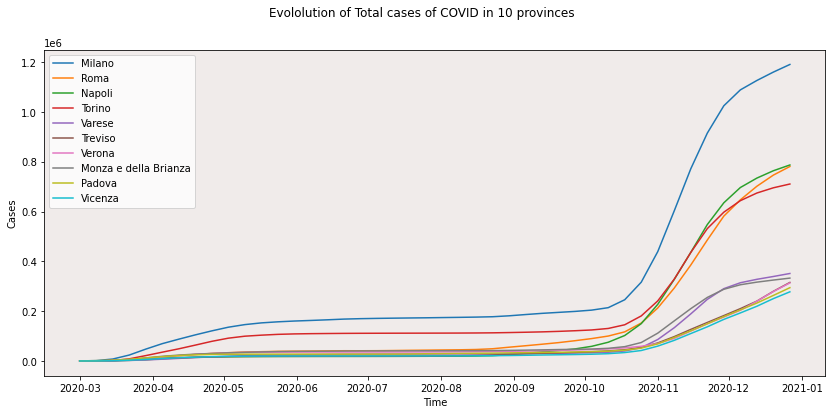

In [33]:
# start plotting using matplotlib
fig, ax = plt.subplots(1, 1, figsize=(14,6))
for provin in names_prov: # a cycle used to find all the cities in the list names_prov
    cities = df_plot.loc[df_plot.denominazione_provincia == provin]
    #doesn't print the last week because grouper set a wrong value
    plt.plot(cities["data"][:-1], cities["totale_casi"][:-1], label=provin) # print the data in the x axis,totale casi in the y axis and the provincies to put in the legend 

fig.suptitle("Evololution of Total cases of COVID in " + str(10)+ " provinces")
plt.xlabel('Time')
plt.ylabel('Cases')
ax.set_facecolor("#F0EBEA") # #f0ebea 94.12% rosso, 92.16% verde e 91.76% blu.
plt.legend()
plt.show()

In [34]:
cities

denominazione_provincia       data  totale_casi
405                 Vicenza 2020-03-01           12
406                 Vicenza 2020-03-08          148
407                 Vicenza 2020-03-15          880
408                 Vicenza 2020-03-22         3150
409                 Vicenza 2020-03-29         6264
410                 Vicenza 2020-04-05         9940
411                 Vicenza 2020-04-12        13122
412                 Vicenza 2020-04-19        15310
413                 Vicenza 2020-04-26        17229
414                 Vicenza 2020-05-03        18521
415                 Vicenza 2020-05-10        19192
416                 Vicenza 2020-05-17        19582
417                 Vicenza 2020-05-24        19801
418                 Vicenza 2020-05-31        19887
419                 Vicenza 2020-06-07        19946
420                 Vicenza 2020-06-14        19976
421                 Vicenza 2020-06-21        19991
422                 Vicenza 2020-06-28        20024
423                 Vicenza 2020-07-05        20082
424                 Vicenza 2020-07-12        20123
425                 Vicenza 2020-07-19        20168
426                 Vicenza 2020-07-26        20205
427                 Vicenza 2020-08-02        20374
428                 Vicenza 2020-08-09        20523
429                 Vicenza 2020-08-16        20774
430                 Vicenza 2020-08-23        21162
431                 Vicenza 2020-08-30        21889
432                 Vicenza 2020-09-06        22857
433                 Vicenza 2020-09-13        24006
434                 Vicenza 2020-09-20        24862
435                 Vicenza 2020-09-27        25853
436                 Vicenza 2020-10-04        27092
437                 Vicenza 2020-10-11        29322
438                 Vicenza 2020-10-18        33783
439                 Vicenza 2020-10-25        41995
440                 Vicenza 2020-11-01        59622
441                 Vicenza 2020-11-08        82790
442                 Vicenza 2020-11-15       110094
443                 Vicenza 2020-11-22       137111
444                 Vicenza 2020-11-29       166908
445                 Vicenza 2020-12-06       192838
446                 Vicenza 2020-12-13       219634
447                 Vicenza 2020-12-20       250312
448                 Vicenza 2020-12-27       277577
449                 Vicenza 2021-01-03       125626

In [35]:
figCasiProvince = px.treemap(data_to_plot.sort_values(by='totale_casi', ascending=False).reset_index(drop=True), # hierarchical data using nested rectangles
                 path=["denominazione_provincia"], values="totale_casi", height=800,
                 title='Provinces with the most number of cases',
                 color_discrete_sequence = px.colors.qualitative.G10) #we can use a lot of diff colors such as : qualitative.Plotly,qualitative.Prism etc
figCasiProvince.data[0].textinfo = 'label+text+value'
figCasiProvince.show()

# A simple mathematical description of the spread of a disease in a population 
The SIR model is a model that allows us to make predictions on the evolution of an infectious disease over time. The model is defined by the following parameters:

$ S $, indicates the number of sensitive individuals. When a sensitive individual and a contagious individual come into contact, the sensitive individual contracts the disease and passes to the infectious part.Not yet infected with the disease
<br>
$ I $, indicates the number of infected individuals. These are the individuals who have been infected and are capable of infecting sensitive individuals.
<br>
$ R $, indicates the number of immune or deceased individuals. These are the individuals who have been infected and then removed from the disease, either due to immunization or due to death.
<br>
$ n $, indicates the number of inhabitants in the considered region.
<br>
$\ β $ and $\ γ $ indicate the infection rate and the recovery rate, respectively.1/γ is the mean period of time during which an infected individual can pass it on.

The SIR model describes the change in the population of each of these compartments in terms of two parameters, β and γ

The differential equations describing this model are:

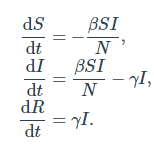



In [42]:
# The SIR model differential equations.
def deriv(y, t, n, beta, gamma):
    S, I, R = y
    dSdt = -(beta*S*I)/n
    dRdt = gamma*I
    dIdt = beta * S * I / N - gamma * I
    return dSdt, dIdt, dRdt

In [43]:
from scipy.integrate import odeint  # Integrate a system of ordinary differential equations.

# Total population, N.
N = 10600000 # number of inhabitants in lombardy
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 210, 0 # the number of immune or deceased individuals is 0 at the initial
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 # the nr of healthy persons
# Infection rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.3, 1./10
# A grid of time points (in days)
t = np.linspace(0, 90, 91) # time in 3 months
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma)) # returns an array containing the value of y for each desired time in t
S, I, R = ret.T #  the transpose of the array

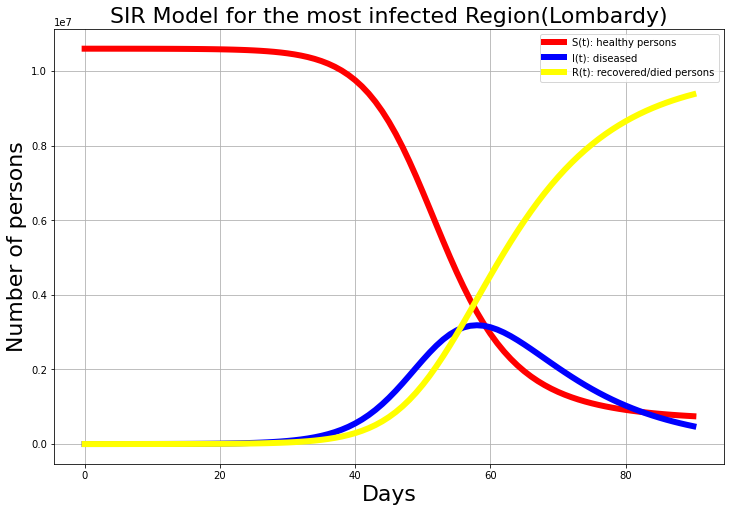

In [44]:
# Plot the data on three separate curves for S(t), I(t) and R(t)

plt.figure(figsize=(12,8))
plt.plot(S, lw = 6, color = 'red', label='S(t): healthy persons')
plt.plot(I, lw = 6, color = 'blue', label='I(t): diseased')
plt.plot(R, lw = 6, color = 'yellow', label='R(t): recovered/died persons')
plt.title('SIR Model for the most infected Region(Lombardy)', size = 22)
plt.xlabel('Days', size = 22)
plt.ylabel('Number of persons', size = 22)
plt.legend()
plt.grid()

In [47]:
# Total population, N.
N = 3730000 # number of inhabitants in Tuscany
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 10, 0 # the number of immune or deceased individuals is 0 at the initial
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 # the nr of healthy persons
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.35, 1./10
# A grid of time points (in days)
t = np.linspace(0, 90, 91) # time in 3 months

y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

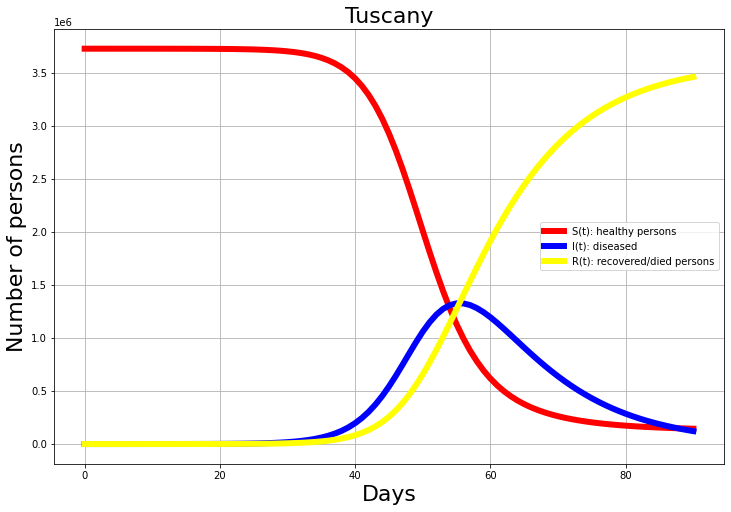

In [48]:
# Plot the data on three separate curves for S(t), I(t) and R(t)

plt.figure(figsize=(12,8))
plt.plot(S, lw = 6, color = 'red', label='S(t): healthy persons')
plt.plot(I, lw = 6, color = 'blue', label='I(t): diseased')
plt.plot(R, lw = 6, color = 'yellow', label='R(t): recovered/died persons')
plt.title('Tuscany', size = 22)
plt.xlabel('Days', size = 22)
plt.ylabel('Number of persons', size = 22)
plt.legend()
plt.grid()

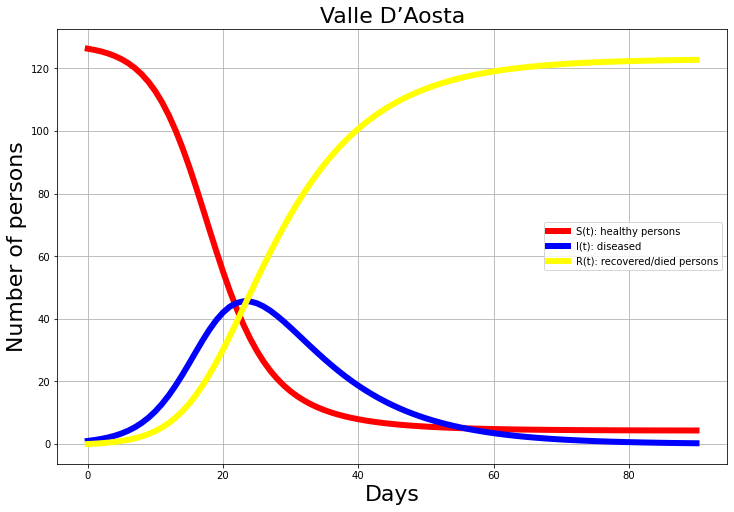

In [49]:
# Total population, N.
N = 127.329 # number of inhabitants in Valle D’Aosta(ragione con meno abitanti)
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0 # the number of immune or deceased individuals is 0 at the initial
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 # the nr of healthy persons
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.35, 1./10
# A grid of time points (in days)
t = np.linspace(0, 90, 91) # time in 3 months

y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T# Plot the data on three separate curves for S(t), I(t) and R(t)

plt.figure(figsize=(12,8))
plt.plot(S, lw = 6, color = 'red', label='S(t): healthy persons')
plt.plot(I, lw = 6, color = 'blue', label='I(t): diseased')
plt.plot(R, lw = 6, color = 'yellow', label='R(t): recovered/died persons')
plt.title('Valle D’Aosta', size = 22)
plt.xlabel('Days', size = 22)
plt.ylabel('Number of persons', size = 22)
plt.legend()
plt.grid()